# Анализ рынка заведений общественного питания Москвы

## Описание проекта
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

## Содержание:
* [Шаг 1. Предобработка данных](#1-bullet)
* [Шаг 2. Анализ данных](#2-bullet)
* 2.1. [Соотношение видов объектов общественного питания по количеству](#2-1-bullet)
* 2.2. [Соотношение сетевых и несетевых заведений](#2-2-bullet)
* 2.3. [Вид объекта, для которого характерно сетевое распространение](#2-3-bullet)
* 2.4. [Сетевые заведения: взаимосвязь между количеством заведений в сети и количество посадочных мест](#2-4-bullet)
* 2.5. [Среднее количество посадочных мест для каждого вида объекта](#2-5-bullet)
* 2.6. [Выделение "улиц" из адреса в отдельный столбец](#2-6-bullet)
* 2.7. [Топ-10 улиц по количеству объектов](#2-7-bullet)
* 2.8. [Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания](#2-8-bullet)
* 2.9. [Районы с улицами, где находится всего одно заведение](#2-9-bullet)
* [Шаг 3. Общий вывод](#3-bullet)

## Шаг №1. Предобработка данных<a class="anchor" id="1-bullet"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_rest_data = pd.read_csv('/datasets/rest_data.csv')

In [3]:
df_rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Описание данных
    
***Таблица rest_data:***

* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

In [4]:
df_rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
df_rest_data.duplicated().sum()

0

In [6]:
df_rest_data['id'].duplicated().sum()

0

    В таблице 15366 строк, пропущенные значения отсутствуют.
    Тип данных в каждой колонке — правильный.
    В таблице отсутствуют полные дубликаты, в колонке ['id'] дубликаты так же отсутствуют.
    
    Посмотри сколько типов объектов существует в таблице и есть ли среди них скрытые дубликаты:

In [7]:
df_rest_data['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

    Существует 9 типов объектов, среди них нет скрытых дубликатов.
    
    Посмотрим, сколько уникальных названий заведений есть в базе.

In [8]:
df_rest_data['object_name'].value_counts()

Столовая             267
Кафе                 236
Шаурма               234
KFC                  155
Шоколадница          142
                    ... 
CIAO BELLA             1
Ресторан «БОЧКА»       1
Кулинария Голубка      1
Роут 66                1
CHEESE connection      1
Name: object_name, Length: 10393, dtype: int64

    В таблице 10393 шт уникальных названий.
    Первые три места занимают "общие названия" - Столовая, Кафе, Шаурма.
    Т.е. места, у которых нет или не указано имя. 
    На 4ом м 5ом месте сети общественного питания  KFC и  Шоколадница.

## Шаг №2. Анализ данных<a class="anchor" id="2-bullet"></a>

### 2.1. Cоотношение видов объектов общественного питания по количеству. <a class="anchor" id="2-1-bullet"></a>

In [9]:
piebar = df_rest_data.groupby('object_type')['id'].count().reset_index().sort_values(by='id', ascending=False)   

In [10]:
piebar

,object_type,id
3,кафе,6099
8,столовая,2587
7,ресторан,2285
6,предприятие быстрого обслуживания,1923
0,бар,856
1,буфет,585
4,кафетерий,398
2,закусочная,360
5,магазин (отдел кулинарии),273


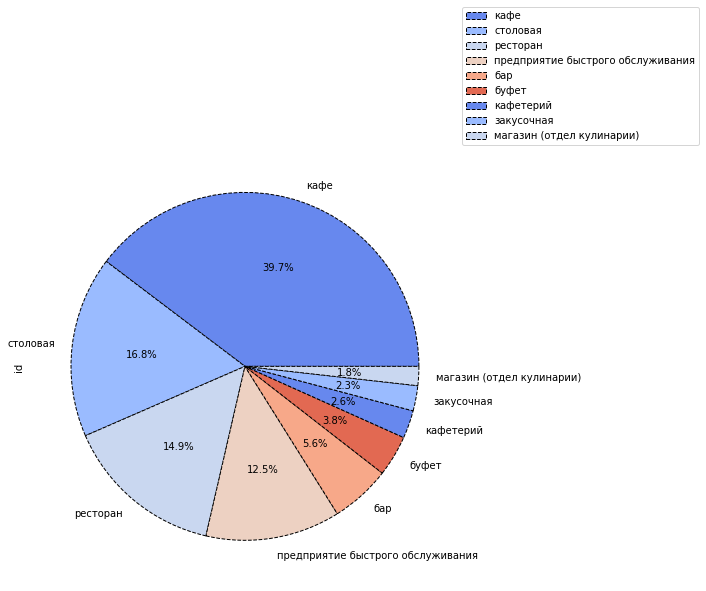

In [73]:
piebar['id'].plot(y='id', kind='pie', figsize=(8, 8), wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, autopct='%1.1f%%', labels=piebar['object_type'])

plt.legend(loc=(01.00, 01.01))

    Cоотношение видов объектов общественного питания по количеству:
    * Самую большую долю занимают кафе - 39,7%
    * На втором месте столовая - 16,8 %
    * На третьем месте ресторан- 14,9 %
    * На четвертом месте предприятия быстрого обслуживания - 12,5%
    
    Доля остальных видов объектов - меньше 6%

### 2.2. Соотношение сетевых и несетевых заведений по количеству<a class="anchor" id="2-2-bullet"></a>

In [12]:
df_rest_data['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

Text(0.5, 1.0, 'Соотношение сетевых и несетевых заведений по количеству')

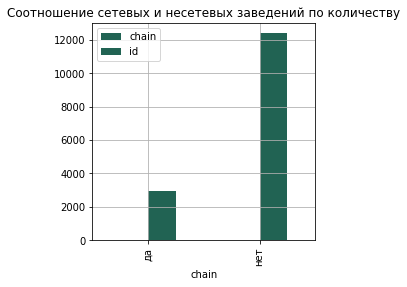

In [13]:
df_rest_data.pivot_table(index='chain', values='id', aggfunc='nunique').plot(kind='bar', grid=True, figsize=(4, 4), color='#216353')
plt.title('Соотношение сетевых и несетевых заведений по количеству')

    В Москве в 4 раза больше несетевых заведений

### 2.3. Для какого вида объекта общественного питания характерно сетевое распространение?<a class="anchor" id="2-3-bullet"></a>

In [15]:
df_chain_proportion = df_rest_data.pivot_table(index='object_type', columns='chain', values='id', aggfunc='count').reset_index()
df_chain_proportion['sum'] = df_chain_proportion['да'] + df_chain_proportion['нет']
df_chain_proportion['ratio'] = (df_chain_proportion['да'] / df_chain_proportion['sum']).round(2)
df_chain_proportion.sort_values(by='ratio', ascending=False)

chain,object_type,да,нет,sum,ratio
6,предприятие быстрого обслуживания,791,1132,1923,0.41
5,магазин (отдел кулинарии),78,195,273,0.29
7,ресторан,544,1741,2285,0.24
3,кафе,1396,4703,6099,0.23
2,закусочная,56,304,360,0.16
4,кафетерий,52,346,398,0.13
0,бар,37,819,856,0.04
1,буфет,11,574,585,0.02
8,столовая,3,2584,2587,0.00


Text(0.5, 1.0, 'Доля сетевого распространения для каждого объекта общественного питания')

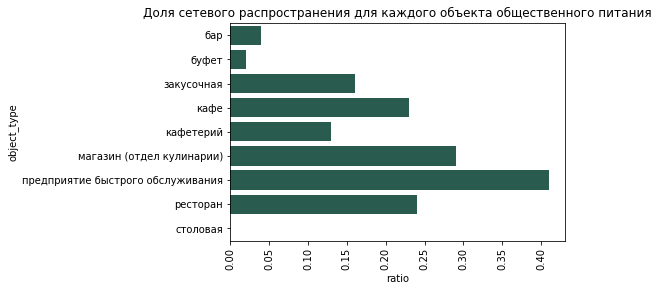

In [16]:
fig = ax = sns.barplot(x='ratio', y='object_type', data=df_chain_proportion, color='#216353')
plt.xticks(rotation=90)
plt.title('Доля сетевого распространения для каждого объекта общественного питания')

    * Сетевое распространение характерно в первую очередь для предприятий быстрого питания.
    41% предприятий быстрого питания являются сетевыми. 
    
    * На втором месте магазины (отдел кулинарии) - 29 % объектов являются сетевыми.
    
    * На третьем месте рестораны и кафе  - 24% и 23 % соответственно
    

### 2.4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?<a class="anchor" id="2-4-bullet"></a>

In [17]:
df_chain = df_rest_data[df_rest_data['chain'] == 'да']

In [18]:
df_chain['number'].describe()

count    2968.000000
mean       52.919811
std        57.140644
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

(-10, 161)

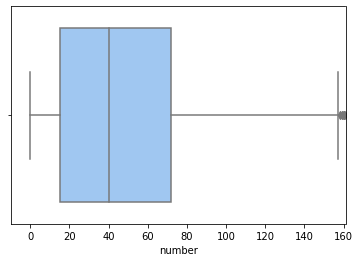

In [19]:
with plt.style.context('seaborn-pastel'):
    ax = sns.boxplot(x='number', data=df_chain)
plt.xlim(-10, 161)

In [20]:
np.percentile(df_chain['number'], [90, 95, 99])

array([120.  , 158.65, 275.33])

    Согласно данным в сетевых заведеняих может и не быть посадочных мест. Например,в 
    торговых центрах в фудкорах, где еть точка выдачи заказа и общий зал с посадочными местами,
    которые не закреплены за отдельным кафе/предприятием общественного питания. Или например,
    окно выдачи в сетях быстрого питания.

    
    У 25% сетевых заведений количество посадочных мест не превышает - 15 шт.
    
    Среднее количество посадочных мест для сетевых заведений - 40 шт.
    
    У 75% сетевых заведений количество посадочных мест не превышает - 72 шт.
    
    У 90% сетевых заведений количество посадочных мест не превышает - 120 шт.
    
    Самый большой выброс у заведения с количеством посадочных мест - 580 шт.
   

**Посмотрим внимательнее на заведения, у которых нет или одно посадочное место:**

    

In [21]:
number_1 = df_chain[df_chain['number'] <= 1]
number_1.head()

,id,object_name,chain,object_type,address,number
290,144091,КОФЕ С СОБОЙ,да,предприятие быстрого обслуживания,"город Москва, 1-я Тверская-Ямская улица, дом 1...",0
498,152450,Суши сет,да,предприятие быстрого обслуживания,"город Москва, Краснопрудная улица, дом 22-24",0
504,157035,Кофе с собой,да,кафетерий,"город Москва, Краснохолмская набережная, дом 1...",0
577,149220,Кофейня «Кофе Хаус»,да,кафе,"город Москва, Павелецкая площадь, дом 1А, стро...",0
938,154596,СтардогS,да,предприятие быстрого обслуживания,"город Москва, Профсоюзная улица, дом 2/22",0


In [22]:
number_1.groupby('object_type')['id'].count().reset_index().sort_values(by='id', ascending=False) 

,object_type,id
6,предприятие быстрого обслуживания,130
3,кафе,55
5,магазин (отдел кулинарии),37
2,закусочная,18
7,ресторан,18
4,кафетерий,16
1,буфет,8
0,бар,1


**заведения, у которых нет или одно посадочное место:**
    
    В основном это предприятие быстрого обслуживания - 45,9%.
    Они часто расположены в фудкоре - зона питания в торговом центре, аэропорту или,
    в некоторых случаях, отдельном здании (например, "Депо" в г Москва), где посетителям
    предлагают услуги сразу несколько предприятий питания, имеющих общий зал для питания.
    
    На втором месте кафе - 19,4 %
    
    На третьем месте магазины (отдел кулинарии) - 13,1% 

    Посмотрим, что характерно для сетевых заведений на примере самой крупной сети
    в датасете - KFC

In [23]:
df_chain_kfc = df_chain[df_chain['object_name'] == 'KFC']
df_chain_kfc

,id,object_name,chain,object_type,address,number
142,26142,KFC,да,ресторан,"город Москва, Бутырская улица, дом 89",67
301,24242,KFC,да,ресторан,"город Москва, улица Грузинский Вал, дом 28/45",40
339,72728,KFC,да,ресторан,"город Москва, Дубнинская улица, дом 30, корпус 1",70
726,69804,KFC,да,предприятие быстрого обслуживания,"город Москва, Можайское шоссе, дом 39",98
853,143264,KFC,да,предприятие быстрого обслуживания,"город Москва, 9-я Парковая улица, дом 30",44
...,...,...,...,...,...,...
15243,205439,KFC,да,предприятие быстрого обслуживания,"город Москва, улица Ленинская Слобода, дом 26,...",30
15244,210743,KFC,да,предприятие быстрого обслуживания,"город Москва, город Московский, улица Хабарова...",0
15245,205607,KFC,да,предприятие быстрого обслуживания,"город Москва, поселение Московский, Киевское ш...",30
15246,214867,KFC,да,кафе,"город Москва, Кутузовский проспект, дом 57",0


In [24]:
df_chain_kfc.groupby('object_type').agg({'object_type':['count'], 'number':['median']})

,object_type,number
,count,median
object_type,,
кафе,26,35
предприятие быстрого обслуживания,99,50
ресторан,30,40


     Мы видим, что у одной сети может быть несколько видов объектов общественного питания.
    
    * Так в сети KFC 63.9% - это предприятия быстрого обслуживания со средним количеством
    посадочных мест - 50 шт. 
    * На втором месте рестораны - 19,4% со средним количеством посадочных мест - 40 шт.
    * И на третьем месте кафе - 16,8% со средним количеством посадочных мест - 35 шт.   
    
    Посмотрим, характерно ли это для других сетей, на примере второй по размерам сети -
    "Шоколадница" 

In [25]:
df_chain_chocolate = df_chain[df_chain['object_name'] == 'Шоколадница']
df_chain_chocolate.groupby('object_type').agg({'object_type':['count'], 'number':['median']})

,object_type,number
,count,median
object_type,,
бар,1,150
кафе,134,50
предприятие быстрого обслуживания,1,40
ресторан,5,72


    Мы видим, что у второй сети 4 вида объектов общественного питания.
    Основной вид кафе. От вида объекта также зависит количество посадочных мест.

**Взаимосвязь между количестовом заведений в сети и количеством посадочных мест**

    Посмотрим есть ли взаимосвязь между количестовом заведений в сети и количеством посадочных
    мест в этих заведениях

In [26]:
cor_chain = df_chain.groupby('object_name').agg({'id':['count'], 'number':['median']})

(0, 20)

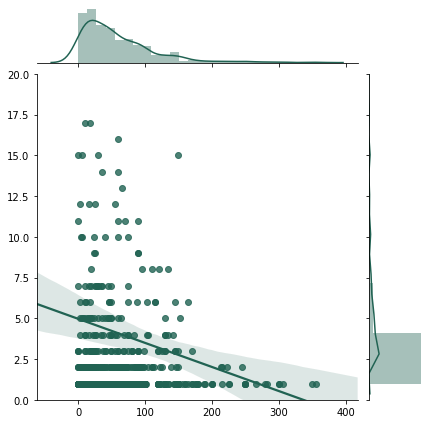

In [27]:
sns.jointplot(x="number", y="id", data=cor_chain, kind='reg', color='#216353')
plt.ylim(0, 20)

    Получили отрицательную линейную корреляцию.
    Чем меньше завидений в сети, тем больше в них посадочных мест и наоборот,
    чем больше заведений в сети, тем меньше посадочных мест.

### 2.5.  Cреднее количество посадочных мест для каждого вида объекта общественного питания.<a class="anchor" id="2-5-bullet"></a>  

In [28]:
df_rest_data.pivot_table(index='object_type', values='number', aggfunc='median').round().sort_values(by='number', ascending=False)  

,number
object_type,
столовая,103
ресторан,80
бар,35
буфет,32
кафе,30
кафетерий,6
предприятие быстрого обслуживания,5
закусочная,0
магазин (отдел кулинарии),0


Text(0.5, 1.0, 'Cреднее количество посадочных мест для каждого вида объекта общественного питания')

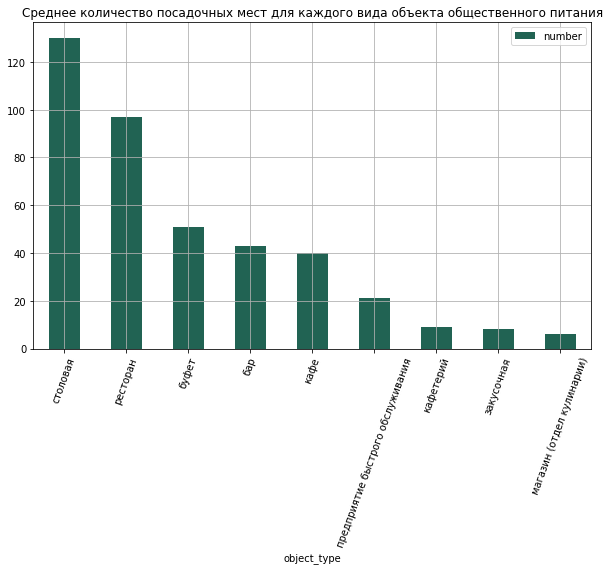

In [29]:
df_rest_data.pivot_table(index='object_type', values='number', aggfunc='mean').round().sort_values(by='number', ascending=False).plot(kind='bar', grid=True, figsize=(10, 6), color='#216353')
plt.xticks(rotation=70)
plt.title('Cреднее количество посадочных мест для каждого вида объекта общественного питания')

Text(0.5, 1.0, 'Cреднее количество посадочных мест для каждого вида объекта общественного питания')

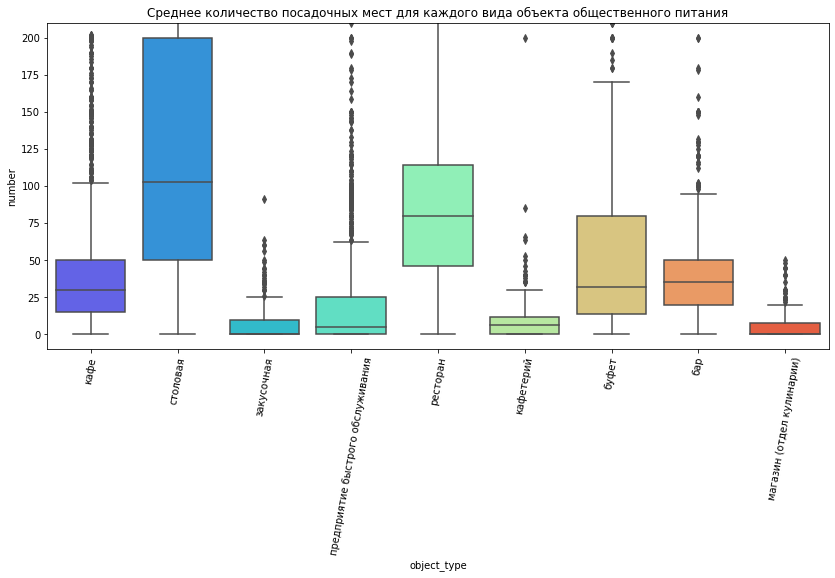

In [30]:
plt.figure(figsize=(14,6))
sns.boxplot(x="object_type", y="number", data=df_rest_data, palette='rainbow')
plt.ylim(-10, 210)
plt.xticks(rotation=80)
plt.title('Cреднее количество посадочных мест для каждого вида объекта общественного питания')


**Cтоловая** представляет в среднем самое большое количество посадочных мест - 103 шт. 
По графику boxplot видим, что у 25% столовых (нижний квартиль) посадочных мест около 50 шт. 
Верхний квартиль - около 200 шт посадочных мест.
    
На втором месте **рестораны**. В среднем в ресторане 80 посадочных мест.
По графику boxplot видим, что у 25% ресторанов (нижний квартиль) посадочных мест около 45 шт. 
Верхний квартиль - около 120 шт посадочных мест. 
    
На третьем месте идет следующая группа: **бар, буфет, кафе**. В этих заведениях в среднем около 30-35 посадочных мест. По графику boxplot видим, что у 25% заведений этой группы (нижний квартиль) посадочных мест около 20 шт. 
Отличие в верхнем квартиле. Если для кафе и баров верхний квартель  - около 50 шт посадочных мест, то у буфета он выше - около 80.
    
Последняя группа: **кафетерий, предприятие быстрого обслуживания, закусочная, магазин (отдел кулинарии)**. Для нее характерны минимальные количества посадочных мест.  По графику boxplot видим, что у заведений этой группы нижний квартиль- 0 посадочных мест. Верхний квартиль у кафетерия, закусочной и магазина (отдел кулинарии) не привышает 13 пасадочных мест, у предприятие быстрого обслуживания - 25 посадочных мест. Среднее значение для этой группы от 0 до 5.      
    
    


### 2.6. Выделите в отдельный столбец информацию об улице из столбца address<a class="anchor" id="2-6-bullet"></a>

In [31]:
df_rest_data['street'] = ''
def streets(row):
    address = row[4]
    address = address.split(', ')
    street = address[1]
    if  (((street.count('поселение') > 0) | 
          (street.count('поселок') > 0) |
          (street.count('деревня') > 0) |
          (street.count('город') > 0)) & 
         (len(address)>2)):
        address[1] = address[2]
    row[6] = address[1]
    return row

In [32]:
df_rest_data = df_rest_data.apply(streets, axis=1)

In [33]:
df_rest_data.head(5)

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


    Загрузим таблицу с улицами, районами и административными округами Москвы,
    объединим ее с датафреймом ресторанов.

In [34]:
region_moscow = pd.read_excel('region_moscow.xlsx')

In [35]:
region_moscow.head()

,street,district,quantity_district,region,quantity_region
0,проспект Мира,"Северо-Восточный, Центральный",2,"Алексеевский, Марьина роща, Мещанский, Останк...",7
1,Профсоюзная улица,Юго-Западный,1,"Академический, Коньково, Обручевский, Тёплый С...",6
2,Ленинградский проспект,Северный,1,"Аэропорт, Беговой, Сокол, Хорошёвский",4
3,Пресненская набережная,Центральный,1,Пресненский,1
4,Варшавское шоссе,Юго-Западный,1,"Северное Бутово, Южное Бутово, Донской, Нагат...",8


In [36]:
df_rest_data_region = df_rest_data.merge(region_moscow,on='street')
df_rest_data_region.head()

,id,object_name,chain,object_type,address,number,street,district,quantity_district,region,quantity_region
0,22139,ХуанХэ,нет,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,1-й Балтийский переулок,Северный,1,Аэропорт,1
1,25833,АЗЕРБАЙДЖАН,нет,ресторан,"город Москва, улица Демьяна Бедного, дом 4",180,улица Демьяна Бедного,Северо-Западный,1,Хорошёво-Мневники,1
2,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,Юго-Западный,1,"Северное Бутово, Южное Бутово, Донской, Нагат...",8
3,23618,Кафе «Subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе,Юго-Западный,1,"Северное Бутово, Южное Бутово, Донской, Нагат...",8
4,155852,Кафе «Ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе,Юго-Западный,1,"Северное Бутово, Южное Бутово, Донской, Нагат...",8


### 2.7. Топ-10 улиц по количеству объектов общественного питания.<a class="anchor" id="2-7-bullet"></a>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

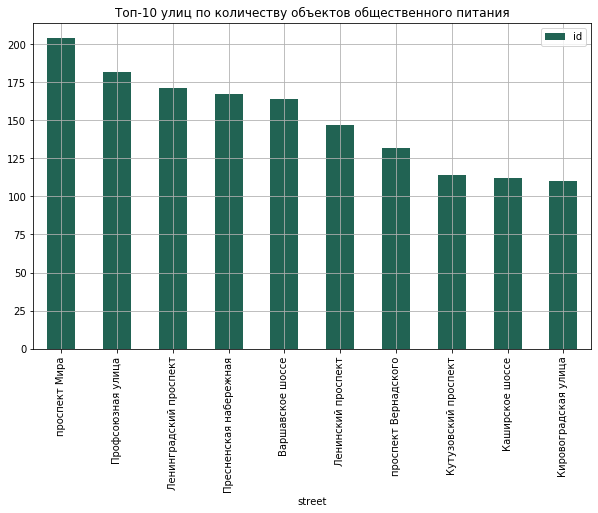

In [37]:
rest_streets_top10 = df_rest_data_region.pivot_table(index='street', values='id', aggfunc='count').round().sort_values(by='id', ascending=False).head(10)
rest_streets_top10.plot(kind='bar', grid=True, figsize=(10, 6), color='#216353')
plt.title('Топ-10 улиц по количеству объектов общественного питания')
plt.xticks(rotation=90)

    Посмотрим, в каких районах Москвы находятся эти улицы

In [38]:
rest_streets = df_rest_data_region.groupby(['street', 'quantity_region', 'region'])['id'].count().reset_index().sort_values(by='id', ascending=False)
pd.set_option('display.max_colwidth', -1)
rest_streets.head(10)

,street,quantity_region,region,id
75,проспект Мира,7,"Алексеевский, Марьина роща, Мещанский, Останкинский, Ростокино, Свиблово, Ярославский",204
66,Профсоюзная улица,6,"Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево",182
63,Ленинградский проспект,4,"Аэропорт, Беговой, Сокол, Хорошёвский",171
65,Пресненская набережная,1,Пресненский,167
59,Варшавское шоссе,8,"Северное Бутово, Южное Бутово, Донской, Нагатино-Садовники, Нагорный, Северное Чертаново, Центральное Чертаново, Южное Чертаново",164
64,Ленинский проспект,8,"Гагаринский, Донской, Ломоносовский, Обручевский, Проспект Вернадского, Тёплый Стан, Тропарёво-Никулино, Якиманка",147
74,проспект Вернадского,5,"Гагаринский, Ломоносовский, Проспект Вернадского, Раменки, Тропарёво-Никулино",132
62,Кутузовский проспект,2,"Дорогомилово, Фили-Давыдково",114
60,Каширское шоссе,4,"Москворечье-Сабурово, Нагатино-Садовники, Северное Орехово-Борисово, Южное Орехово-Борисово",112
61,Кировоградская улица,3,"Северное Чертаново, Центральное Чертаново, Южное Чертаново",110


    Улицы, на которых больше остальных располагаются объекты общественного питания,
    проходят через несколько районов Москвы. Варшавское шоссе и Ленинский проспект
    растягиваются на 8 районов, проспект Мира на 7 районов. Исключение составляет только
    Пресненская набережная - находится в одном районе. Соответственно у данных улиц большая
    протяженность, что объясняет большое количество заведений, расположенных на них.    

### 2.8. Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания<a class="anchor" id="2-8-bullet"></a>

In [39]:
top_10_streets_list = ['проспект Мира', 'Профсоюзная улица', 'Ленинградский проспект', 'Пресненская набережная', 'Варшавское шоссе', 'Ленинский проспект', 'проспект Вернадского', 'Кутузовский проспект', 'Каширское шоссе', 'Кировоградская улица']

In [40]:
top_10_streets_table = df_rest_data_region.query('street in @top_10_streets_list')

In [41]:
cor_top_10_streets = top_10_streets_table.groupby(['street']).agg({'id':['count'], 'number':['median']})
cor_top_10_streets.head()

,id,number
,count,median
street,,
Варшавское шоссе,164,30.0
Каширское шоссе,112,25.0
Кировоградская улица,110,30.0
Кутузовский проспект,114,40.0
Ленинградский проспект,171,40.0


(0, 250)

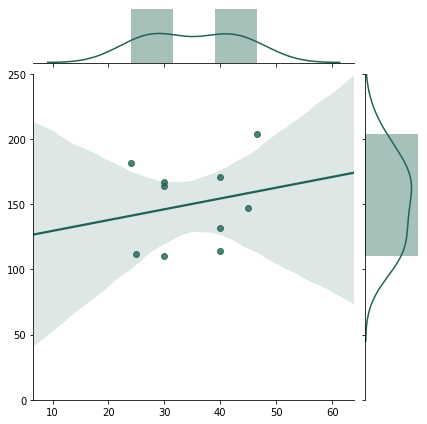

In [42]:
sns.jointplot(x="number", y="id", data=cor_top_10_streets, kind='reg', color='#216353')
plt.ylim(0, 250)

    Видим не большую положительную линейную корреляцию.
    Чем больше заведений на улице, тем больше посадочных мест в этих заведениях. 

### 2.9. Найдите число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?<a class="anchor" id="2-9-bullet"></a>

In [43]:
streets_one_rest = df_rest_data.groupby('street')['id'].count().reset_index()

In [44]:
qty = streets_one_rest[streets_one_rest['id'] == 1]

In [45]:
qty['street'].count()

722

    В датафрейме 722 улицы, на которых располагается 1 объект общественного питания.
    Посмотрим, в каких районах они находятся. 

In [46]:
one_rest_streets_with_region = df_rest_data_region.groupby(['street', 'region', 'district'])['id'].count().reset_index()
one_rest_streets_with_region = one_rest_streets_with_region[one_rest_streets_with_region['id'] == 1]
one_rest_streets_with_region.head(5) 

,street,region,district,id
0,1-й Балтийский переулок,Аэропорт,Северный,1
1,1-й Басманный переулок,"Басманный, Красносельский",Центральный,1
2,1-й Ботанический проезд,Свиблово,Северо-Восточный,1
3,1-й Вешняковский проезд,Рязанский,Юго-Восточный,1
4,1-й Голутвинский переулок,Якиманка,Центральный,1


In [47]:
one_rest_streets_with_region['region'].nunique()

77

In [48]:
print(one_rest_streets_with_region['region'].unique())

['Аэропорт' 'Басманный, Красносельский' 'Свиблово' 'Рязанский' 'Якиманка'
 'поселение Троицк' 'Хамовники' 'Соколиная Гора' 'Даниловский район'
 ' Даниловский ' 'Красносельский и Мещанский  ' ' Таганский' 'Пресненский'
 'Печатники' 'Сокольники' 'Замоскворечье' 'Хорошёвский' 'Арбат'
 ' Алексеевский' 'Текстильщики' 'Ростокино' 'Раменки' 'Хорошёво-Мневники'
 'Якиманка ' 'Покровское-Стрешнево' 'Марьина роща' 'Богородское'
 'Нижегородский' 'Тверской' 'Лосиноостровский' 'Преображенское'
 'Ново-Переделкино' 'Хорошево-Мневники' 'Гольяново' 'Измайлово'
 'Восточное Измайлово' 'Беговой' 'Донской' 'Лефортово' 'Красносельский'
 'Хорошевский' 'Войковский' 'Бутырский' 'Южное Тушино' ' Коптево'
 'Отрадное' 'Преображенский' 'Южное Бутово' 'Митино' 'Северное Бутово'
 'Ясенево' 'Капотня' 'Фили-Давыдково' 'Алексеевский'
 'Москворечье-Сабурово' 'Можайский' 'Можайский район' 'Южнопортовый'
 'Некрасовка' 'Щукино' 'Таганский' 'Косино-Ухтомский' 'Царицыно'
 'Дорогомилово' 'Тимирязевский' 'поселение Московский' 

    Улицы, на которых располагается всего 1 объект общественного питания, находятся практически
    на всей территории Москвы, а именно в 77 районах. Посмотрим, в каких административных
    округах находятся данные районы.

In [49]:
one_rest_streets_with_region['district'].nunique()

11

In [58]:
sns.set_palette('coolwarm')

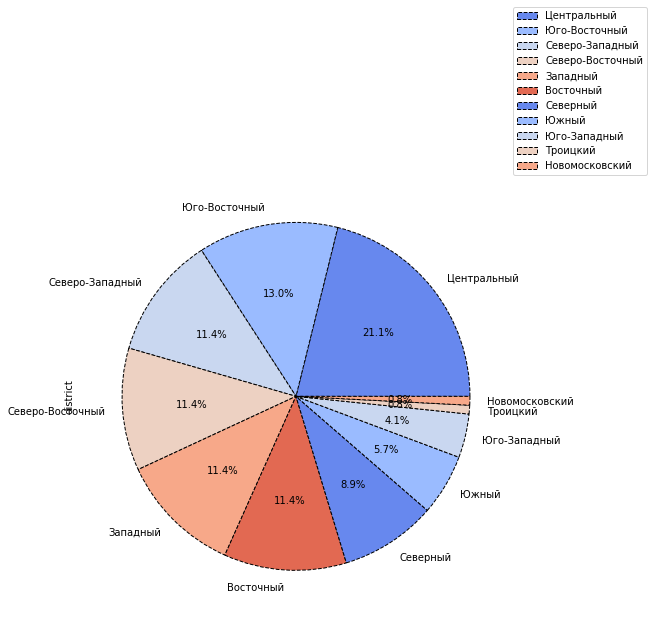

In [65]:
one_rest_streets_with_region['district'].value_counts(ascending=False).plot(y='district', kind='pie', figsize=(8, 8), wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, autopct='%1.1f%%')
plt.legend(loc=(01.00, 01.01))

    На первом месте Центральный АО, который расположен в центре города - 21.1%.
    Можно предположить, что улицы, на которых расположены по одному заведению  - это небольшие
    переулки в центре города.

### Шаг 3. Выводы<a class="anchor" id="3-bullet"></a>

1. В таблице встречается 10393 шт. уникальных названий. По численности первые три места занимают "общие названия" - Столовая, Кафе, Шаурма. Т.е. места, у которых нет или не указано имя. На 4ом и 5ом месте по количеству заведений находятся сети общественного питания  KFC и  Шоколадница.
    

2. Cоотношение видов объектов общественного питания по количеству: 

   * Самую большую долю в видах объектов общественного питания по количеству занимают кафе - 39,7%
   * На втором месте столовая - 16,8 %
   * На третьем месте ресторан- 14,9 %
   * На четвертом месте предприятия быстрого обслуживания - 12,5%
   * Доля остальных видов объектов - меньше 6% (бар, буфет, кафетерий, закусочная, магазин
    (отдел кулинарии))


3. Соотношение сетевых и несетевых заведений по количеству:
 
    * не сетевые объекты питания - 12398 шт.
    * сетевые объекты питания - 2968 шт.

Таким образом, в Москве в 4 раза больше несетевых заведений.

4. Виды объектов общественного питания, для которых характерно сетевое распространение:

    * Сетевое распространение характерно в первую очередь для предприятий быстрого питания. 41% объктов являются сетевыми.     
    * На втором месте магазины (отдел кулинарии) - 29 % объектов являются сетевыми.
    * На третьем месте рестораны и кафе  - 24% и 23 % соответственно
    

5. Зависимость посадочных мест в заведениях сети от количества заведений в этой сети:
    
    Согласно данным в сетевых заведеняих может и не быть посадочных мест. Например, в торговых центрах в фудкорах, где еть точка выдачи заказа и общий зал с посадочными местами, которые не закреплены за отдельным кафе/предприятием общественного питания. Или например, окно выдачи в сетях быстрого питания.
    
    Заведения, у которых нет или одно посадочное место:

    * В основном это предприятие быстрого обслуживания - 45,9%. Они расположене в фудкоре - зона питания в торговом центре, аэропорту или, в некоторых случаях, отдельном здании (например, "Депо"), где посетителям предлагают услуги сразу несколько предприятий питания, имеющих общий зал для питания.
    * На втором месте кафе - 19,4 %
    * На третьем месте магазины (отдел кулинарии) - 13,1%
    
   Анализ количества посадочных мест для всех сетевых заведений:
    
    * У 25% сетевых заведений количество посадочных мест не превышает - 15 шт.
    * Среднее количество посадочных мест для сетевых заведений - 40 шт.
    * У 75% сетевых заведений количество посадочных мест не превышает - 72 шт.
    * У 90% сетевых заведений количество посадочных мест не превышает - 120 шт.



При анализе было выявлено, что у одной сети может быть несколько видов объектов общественного питания и в зависимости от вида будет различатся среднее количсество посадочных мест.

* Так в сети KFC 63.9% это предприятия быстрого обслуживания со средним количеством посадочных мест - 50 шт.
* На втором месте в сети KFC: рестораны. 19,4% со средним количеством посадочных мест - 40 шт.
* И на третьем месте в сети KFC: кафе. 16,8% со средним количеством посадочных мест - 35 шт.


При анализе взаимосвязи между количестовом заведений в сети и количеством посадочных мест в этих заведениях, получили отрицательную линейную корреляцию. Чем меньше завидений в сети, тем больше в них посадочных мест и наоборот, чем больше заведений в сети, тем меньше посадочных мест.

6.  Cреднее количество посадочных мест для каждого вида объекта общественного питания.  

*Cтоловая* представляет в среднем самое большое количество посадочных мест - 103 шт. 
У 25% столовых (нижний квартиль) посадочных мест около 50 шт. 
Верхний квартиль - около 200 шт посадочных мест.
    
На втором месте *рестораны*. В среднем в ресторане 80 посадочных мест.
У 25% ресторанов (нижний квартиль) посадочных мест около 45 шт. 
Верхний квартиль - около 120 шт посадочных мест. 
    
На третьем месте идет следующая группа: *бар, буфет, кафе*. В этих заведениях в среднем около 30-35 посадочных мест. У 25% заведений этой группы (нижний квартиль) посадочных мест около 20 шт. 
Отличие в верхнем квартиле. Если для кафе и баров верхний квартель  - около 50 шт посадочных мест, то у буфета он выше - около 80.
    
Последняя группа: *кафетерий, предприятие быстрого обслуживания, закусочная, магазин (отдел кулинарии)*. Для нее характерны минимальные количества посадочных мест. У заведений этой группы нижний квартиль- 0 посадочных мест. Верхний квартиль у кафетерия, закусочной и магазина (отдел кулинарии) не привышает 13 пасадочных мест, у предприятие быстрого обслуживания - 25 посадочных мест. Среднее значение для этой группы от 0 до 5. 

7. Топ-10 улиц по количеству объектов общественного питания:
    
Проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица.

Данные улицы проходят через несколько районов Москвы. Например, Варшавское шоссе и Ленинский проспект растягиваются на 8 районов, проспект Мира на 7 районов. Исключение составляет только Пресненская набережная - находится в одном районе. Соответственно у данных улиц большая протяженность, что объясняет большое количество заведений, расположенных на них.    

8. Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания:
    
Видим не большую положительную линейную корреляцию. Чем больше заведений на улице, тем больше посадочных мест в этих заведениях. 
    

9. Улицы с одним объектом общественного питания: 

В датафрейме 722 улицы, на которых располагается 1 объект общественного питания. Данные улицы, находятся практически на всей территории Москвы, а именно в 77 районах. Эти районы располагаются во всех  административных округах. 

На первом месте по количеству улиц с одним заведением общественного питания находится - Центральный административный округ, который расположен в центре города - 21.1%. Можно предположить, что улицы, на которых расположены по одному заведению  - это небольшие переулки в центре города.
    
Статистика по районам:
- Центральный - 21,1%
- Юго-Восточный - 13%
- Северо-Восточный - 11,4%
- Восточный - 11,4%
- Западный - 11,4%
- Северо-Западный - 11,4%
- Северный - 8,94%
- Южный - 5,69%
- Юго-Западный - 4,07 %
- Троицкий - 0,8%
- Новомосковский - 0,8%
    
    
    
10. Для выбора месторасположения кафе информации о улицах с 1 заведением или самым большим количеством заведений не достаточно. Необходимо также учитывать следующие факторы:
    
    

* Ценовой сегмент нашего кафе: демократический или дорогое модное заведение. Исходя из этого нужно выбирать район / улицу. Анализировать ближайших конкурентов в ценовом сегменте.
* Количество людей, проходящих в единицу времени непосредственно рядом со входом в кафе.
* Транспортная доступность ( в том числе общественным транспортном), возможности для парковки автомобилей
* Состав проживающих, работающих и просто случайных людей в районе деятельности. Это важно, поскольку, например, если разместиться в офисном районе, то бывает, довольно сложно заполнить кафе в выходные дни.
* Анализ объектов рядом – есть ли бизнес-центры, учреждения, вузы, торговые центры и т.д.)
* Неизвестна кухня заведения (европейская, азиатская и т.д.) Когда первый интерес к роботам пропадет, посетители будут оценивать кухню заведения. Необходимо понимать какие конкуренты и в каком количестве будут находится поблизости с новым кафе. Нет смысла открывать 8ой суши бар.
